## Redes Neuronales Artificilaes (RNA) ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

2025-05-05 16:26:05.624576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 16:26:05.628324: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 16:26:05.640589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746480365.660968    6723 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746480365.667172    6723 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746480365.683128    6723 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from IPython.display import Image
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# Image('fashion.png')

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

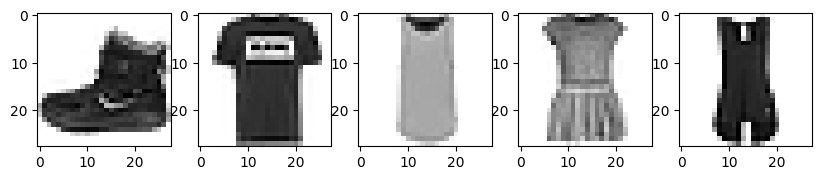

In [7]:
plt.figure(figsize=(10,10))

for i, image in enumerate(x_train[0:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap = plt.cm.binary)
    


In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28)).astype('float32')

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.add(tf.keras.layers.Dense(300,  activation='relu', input_shape=[28,28]))
model.add(tf.keras.layers.Dense(100,  activation='relu', input_shape=[28,28]))
model.add(tf.keras.layers.Dense(10,  activation='softmax', input_shape=[28,28]))

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-05 16:26:09.301440: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-05-05 16:26:09.301492: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-05 16:26:09.301507: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: fisica6-iMac
2025-05-05 16:26:09.301517: I ex

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2025-05-05 16:26:09.745717: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6080 - sparse_categorical_accuracy: 0.7848
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8670
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3196 - sparse_categorical_accuracy: 0.8833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2954 - sparse_categorical_accuracy: 0.8886
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2798 - sparse_categorical_accuracy: 0.8952
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2630 - sparse_categorical_accuracy: 0.9004
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2551 - sparse_categorical_accuracy: 0.9019
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2446 - sparse_categorical_accuracy: 0.9065
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2327 - sparse_categorical_accuracy: 0.9122
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3381 - sparse_categorical_accuracy: 0.8851   


In [17]:
index = np.random.randint(0, 100, 1)

In [18]:
index

array([59])

In [19]:
x_testing = x_train[index]

In [20]:
y_p = model.predict(x_testing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


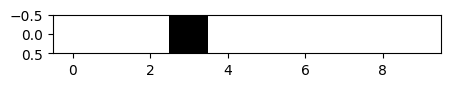

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(y_p, cmap=plt.cm.binary)

In [22]:
y_train[index]

array([3], dtype=uint8)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [26]:
from tensorflow.keras.datasets import mnist

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [29]:
x_train = x_train.reshape((x_train.shape[0], 28, 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28)).astype('float32') / 255

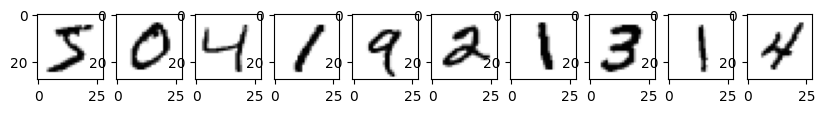

In [37]:
plt.figure(figsize=(10,10))

m = 10

for i, image in enumerate(x_train[0:m]):
    plt.subplot(1, m, i+1)
    plt.imshow(image, cmap = plt.cm.binary)

In [44]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 80)             │        24,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,390 (1017.15 KB)

 Trainable params: 260,390 (1017.15 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
  37/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9891  

2025-05-05 16:52:17.880656: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0239 - sparse_categorical_accuracy: 0.9922
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0224 - sparse_categorical_accuracy: 0.9926
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0206 - sparse_categorical_accuracy: 0.9935
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0179 - sparse_categorical_accuracy: 0.9946
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.9930
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0195 - sparse_categorical_accuracy: 0.9940
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0152 - sparse_categorical_accuracy: 0.9950
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0196 - sparse_categorical_accuracy: 0.9937
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0156 - sparse_categorical_accuracy: 0.9949
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s

In [52]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1290 - sparse_categorical_accuracy: 0.9812     


In [78]:
n = 25
y_pred = model.predict(x_test[[n]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [79]:
np.argmax(y_pred)

np.int64(0)

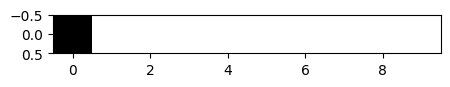

In [80]:
plt.figure(figsize=(5,5))
plt.imshow(y_pred, cmap=plt.cm.binary)

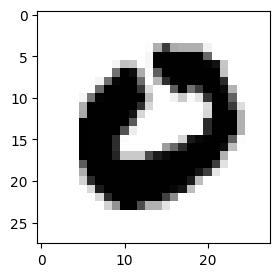

In [81]:
plt.figure(figsize=(3,4))
plt.imshow(x_test[n], cmap = plt.cm.binary)